### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

In [1]:
using Pkg
using Roots  
using Plots
using ForwardDiff
using DataFrames
using SpecialFunctions
using NoveltyColors
using Images
using Polynomials


(process:45116): GLib-GIO-WARNING **: 13:46:15.171: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22031.10071.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


<span style="color:#006666"> używane metody: </span>
1. wykorzystująca przedział i zmianę znaku - bisekcja
2. wykorzystującą pochodną - metoda Newtona
3. metoda korzystająca z przybliżenia pochodnej - metoda Steffensena

<span style="color:#006666"> testowane funkcje: </span>
1. $f(x) = x \cdot \exp ( - x )$
2. $f(x) = ( x + 3 ) \cdot ( x - 1 )^2$
3. $f(x) = x^3$
4. $f(x) = x^3-2x-5$ 
5. $f(x) = (x-1)^7$, written term by term $ x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3- 21x^2+ 7x - 1$ 
6. $f(x) = sin(x) - \frac{x}{2}$

In [2]:
f1(x) = x*exp(-x)
f2(x) = (x+3)*(x-1)^2
f3(x) = x^3
f4(x) = x^3-2*x-5
f5(x) = x^7 - 7 * x^6 + 21 * x^5 - 35 * x^4 + 35 * x^3 - 21 * x^2 + 7 * x - 1 
f6(x) = sin(x) - x/2

as = [-0.1, -4, -1, -2, 0.988, -4]
bs = [4, 2, 1, 4, 1.012, 4]
fs = [f1, f2, f3, f4, f5, f6]

6-element Vector{Function}:
 f1 (generic function with 1 method)
 f2 (generic function with 1 method)
 f3 (generic function with 1 method)
 f4 (generic function with 1 method)
 f5 (generic function with 1 method)
 f6 (generic function with 1 method)

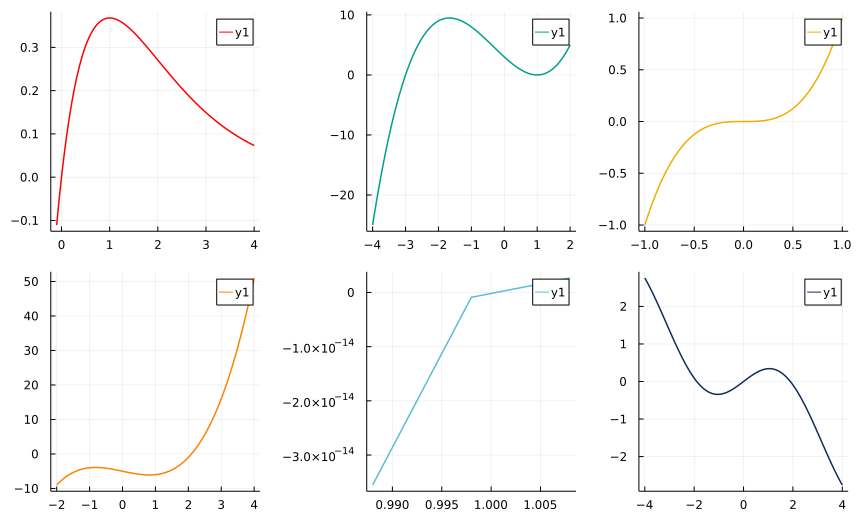

In [3]:
p = []
col = ColorDict["wesanderson"]["Darjeeling1"]
push!(col, "#0F2B5F")
for i = 1:6 push!(p, plot(as[i]:0.01:bs[i], [fs[i](x) for x in as[i]:0.01:bs[i]], color=col[i], width = 1.5)) end
plot(p[1], p[2], p[3], p[4], p[5], p[6], layouts=(2, 3), size=(860, 520))

In [4]:
function check(f, x)
    iszero(f(x)) || (f(prevfloat(x)) * f(x) < 0.0 || f(x) * f(nextfloat(x)) < 0.0)
end

check (generic function with 1 method)

In [5]:
function calc_roots(fs, a, b)
    n = length(fs)
    df = DataFrame(fn=[], iterations=Int64[], calls=Int64[], method=String[], found_root=Float64[], acceptable=Bool[])
    for i = 1:n
        for j = 1:3
            tracker = Roots.Tracks()
            if j == 1
                x = find_zero(fs[i], (a[i], b[i]), Bisection(), verbose = true, tracks = tracker)
                mname = "Bisection"
            elseif j == 2
                D(f) = x->ForwardDiff.derivative(fs[i], float(x))
                x = find_zero((fs[i], D(fs[i])), a[i], Roots.Newton(), verbose = true, tracks = tracker)    
                mname = "Newton"    
            else      
                x = find_zero(fs[i], a[i], Order1(), verbose = true, tracks = tracker) 
                mname = "Secant"    
            end
            push!(df, (fs[i], tracker.steps, tracker.fncalls, mname, x, check(fs[i], x)))
            
        end
    end
    return df
end        

calc_roots (generic function with 1 method)

In [6]:
df = calc_roots(fs, as, bs)
print()

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 4 )



Results of univariate zero finding:

* Converged to: -4.498484366669896e-17
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.10000000000000001,	 fx₁ = -0.11051709180756478
x₂ = -0.0090909090909090939,	 fx₂ = -0.0091739305173563594
x₃ = -8.1900081900081537e-05,	 fx₃ = -8.1906789798181728e-05
x₄ = -6.7070741053068539e-09,	 fx₄ = -6.7070741502916976e-09
x₅ = -4.498484366669896e-17,	 fx₅ = -4.498484366669896e-17



Results of univariate zero finding:

* Converged to: -3.5080094145810913e-22
* Algorithm: Secant()
* iterations: 6
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.099993944541880764,	 fx₁ = -0.11050973030228603
x₂ = -0.10000000000000001,	 fx₂ = -0.11051709180756478
x₃ = -0.0090903836158034296,	 fx₃ = -0.0091733954230322889
x₄ = -0.00086145681917149629,	 fx₄ = -0.00086219924676153494
x₅ = -7.7921558383551963e-06,	 fx₅ = -7.7922165562843668e-06
x₆ = -6.7096891803063901e-09,	 fx₆ = -6.7096892253263194e-09
x₇ = -5.2282739845980163e-14,	 fx₇ = -5.228273984598289e-14
x₈ = -3.5080094145810913e-22,	 fx₈ = -3.5080094145810913e-22



Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( -4, 0 )
(a₁, b₁) = ( -4, -2.237502219360062e-154 )
(a₂, b₂) = ( -4, -3.0226589942830556e-77 )
(a₃, b₃) = ( -4, -1.1020259538958945e-38 )
(a₄, b₄) = ( -4, -2.1006417091906648e-19 )
(a₅, b₅) = ( -4, -9.1677065938711166e-10 )
(a₆, b₆) = ( -4, -6.0558319091796875e-05 )
(a₇, b₇) = ( -4, -0.01556396484375 )
(a₈, b₈) = ( -4, -0.24951171875 )
(a₉, b₉) = ( -4, -0.9990234375 )
(a₁₀, b₁₀) = ( -4, -1.9990234375 )
(a₁₁, b₁₁) = ( -4, -2.9990234375 )
(a₁₂, b₁₂) = ( -3.49951171875, -2.9990234375 )
(a₁₃, b₁₃) = ( -3.249267578125, -2.9990234375 )
(a₁₄, b₁₄) = ( -3.1241455078125, -2.9990234375 )
(a₁₅, b₁₅) = ( -3.06158447265625, -2.9990234375 )
(a₁₆, b₁₆) = ( -3.030303955078125, -2.9990234375 )
(a₁₇, b₁₇) = ( -3.0146636962890625, -2.9990234375 )
(a₁₈, b₁₈) = ( -3.0068435668945312, -2.9990234375 )
(a₁₉, b₁₉) = ( -3.0029335021972656, -2

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = -4,	 fx₁ = -25
x₂ = -3.2857142857142856,	 fx₂ = -5.247813411078714
x₃ = -3.0336134453781511,	 fx₃ = -0.54689201434404511
x₄ = -3.0005510400881663,	 fx₄ = -0.008819070739411761
x₅ = -3.00000015175987,	 fx₅ = -2.4281581043131463e-06
x₆ = -3.0000000000000115,	 fx₆ = -1.8474111129762711e-13
x₇ = -3,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Secant()
* iterations: 8
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = -3.9999939443988737,	 fx₁ = -24.999788054363954
x₂ = -4,	 fx₂ = -25
x₃ = -3.285712926285119,	 fx₃ = -5.2477851127736566
x₄ = -3.0959405340197992,	 fx₄ = -1.6095683257636169
x₅ = -3.0119841208711278,	 fx₅ = -0.19289660831176433
x₆ = -3.0005524623274464,	 fx₆ = -0.008841839124748516
x₇ = -3.0000032948909343,	 fx₇ = -5.2718341799499422e-05
x₈ = -3.0000000009099619,	 fx₈ = -1.4559390144571292e-08
x₉ = -3.0000000000000013,	 fx₉ = -2.1316282072803025e-14
x₁₀ = -3,	 fx₁₀ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 1 )



Results of univariate zero finding:

* Converged to: -7.822642576269843e-6
* Algorithm: Roots.Newton()
* iterations: 29
* function evaluations ≈ 58
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -1
x₂ = -0.66666666666666674,	 fx₂ = -0.29629629629629639
x₃ = -0.44444444444444448,	 fx₃ = -0.087791495198902614
x₄ = -0.29629629629629634,	 fx₄ = -0.026012294873748929
x₅ = -0.19753086419753091,	 fx₅ = -0.0077073466292589439
x₆ = -0.13168724279835392,	 fx₆ = -0.0022836582605211676
x₇ = -0.087791495198902614,	 fx₇ = -0.00067663948459886455
x₈ = -0.058527663465935076,	 fx₈ = -0.00020048577321447837
x₉ = -0.039018442310623382,	 fx₉ = -5.940319206354914e-05
x₁₀ = -0.026012294873748919,	 fx₁₀ = -1.7600945796607151e-05
x₁₁ = -0.017341529915832612,	 fx₁₁ = -5.2150950508465619e-06
x₁₂ = -0.011561019943888409,	 fx₁₂ = -1.5452133483989817e-06
x₁₃ = -0.0077073466292589396,	 fx₁₃ = -4.5784099211821687e-07
x₁₄ = -0.0051382310861726264,	 fx₁₄ = -1.3565659025724944e-0

Results of univariate zero finding:

* Converged to: -1.1885012642937958e-5
* Algorithm: Secant()
* iterations: 40
* function evaluations ≈ 42

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -0.99998183363664406
x₂ = -1,	 fx₂ = -1
x₃ = -0.66666464816194848,	 fx₃ = -0.29629360496482077
x₄ = -0.52631473269276219,	 fx₄ = -0.14579296929010632
x₅ = -0.39035496864170632,	 fx₅ = -0.05948111965913943
x₆ = -0.29665938652956308,	 fx₆ = -0.026108040811266348
x₇ = -0.22336054308841941,	 fx₇ = -0.011143442352791647
x₈ = -0.16877829427771934,	 fx₈ = -0.0048078374984878679
x₉ = -0.12735800550992871,	 fx₉ = -0.0020657546904808487
x₁₀ = -0.096153931164222189,	 fx₁₀ = -0.00088899871657913956
x₁₁ = -0.072580324859598311,	 fx₁₁ = -0.00038234615147612113
x₁₂ = -0.054790465954702647,	 fx₁₂ = -0.00016448071358459853
x₁₃ = -0.041359750575682815,	 fx₁₃ = -7.0751187430894035e-05
x₁₄ = -0.03122165322145367,	 fx₁₄ = -3.0434606231311089e-05
x₁₅ = -0.023568499314796213,	 fx₁₅ = -1.3091692358205097e-05
x₁₆ = -0.0177913423

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Bisection()
* iterations: 62
* function evaluations ≈ 65
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( 0, 4 )
(a₁, b₁) = ( 2.237502219360062e-154, 4 )
(a₂, b₂) = ( 3.0226589942830556e-77, 4 )
(a₃, b₃) = ( 1.1020259538958945e-38, 4 )
(a₄, b₄) = ( 2.1006417091906648e-19, 4 )
(a₅, b₅) = ( 9.1677065938711166e-10, 4 )
(a₆, b₆) = ( 6.0558319091796875e-05, 4 )
(a₇, b₇) = ( 0.01556396484375, 4 )
(a₈, b₈) = ( 0.24951171875, 4 )
(a₉, b₉) = ( 0.9990234375, 4 )
(a₁₀, b₁₀) = ( 1.9990234375, 4 )
(a₁₁, b₁₁) = ( 1.9990234375, 2.9990234375 )
(a₁₂, b₁₂) = ( 1.9990234375, 2.49853515625 )
(a₁₃, b₁₃) = ( 1.9990234375, 2.248291015625 )
(a₁₄, b₁₄) = ( 1.9990234375, 2.1231689453125 )
(a₁₅, b₁₅) = ( 2.06060791015625, 2.1231689453125 )
(a₁₆, b₁₆) = ( 2.091888427734375, 2.1231689453125 )
(a₁₇, b₁₇) = ( 2.091888427734375, 2.1075286865234375 )
(a₁₈, b₁₈) = ( 2.091888427734375, 2.0997085571289062 )
(a

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Roots.Newton()
* iterations: 8
* function evaluations ≈ 16
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -2,	 fx₁ = -9
x₂ = -1.1000000000000001,	 fx₂ = -4.1310000000000002
x₃ = 1.4343558282208577,	 fx₃ = -4.9177014792136369
x₄ = 2.6130586890162819,	 fx₄ = 7.6160451911063252
x₅ = 2.2010292795760416,	 fx₅ = 1.2608935735310176
x₆ = 2.100428126445542,	 fx₆ = 0.065809014803106081
x₇ = 2.0945708321415641,	 fx₇ = 0.00021598286125534827
x₈ = 2.0945514817531281,	 fx₈ = 2.3528468062750107e-09
x₉ = 2.0945514815423265,	 fx₉ = -8.8817841970012523e-16



Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Secant()
* iterations: 20
* function evaluations ≈ 22
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1.9999939444722106,	 fx₁ = -8.9999394449421217
x₂ = -2,	 fx₂ = -9
x₃ = -1.0999967300104763,	 fx₃ = -4.1309946699523623
x₄ = -0.33640982483244397,	 fx₄ = -4.36525237845684
x₅ = -14.565395394898283,	 fx₅ = -3065.9286644682884
x₆ = -0.31612178740114949,	 fx₆ = -4.3993474188685928
x₇ = -0.29564590800427648,	 fx₇ = -4.4345495589126127
x₈ = -2.8750715291229083,	 fx₈ = -23.015302559603249
x₉ = 0.31996911846716714,	 fx₉ = -5.6071797228257276
x₁₀ = 1.3490959979559949,	 fx₁₀ = -5.242756318086589
x₁₁ = 16.15457056239832,	 fx₁₁ = 4178.5515626265578
x₁₂ = 1.3676488926247217,	 fx₁₂ = -5.1771604596724448
x₁₃ = 1.3859469877585173,	 fx₁₃ = -5.1096990167434839
x₁₄ = 2.7718906417045304,	 fx₁₄ = 10.753701541864675
x₁₅ = 1.8323679742087997,	 fx₁₅ = -2.5124278245689298
x₁₆ = 2.0103010266032735,	

Results of univariate zero finding:

* Converged to: 0.9998124999999999
* Algorithm: Bisection()
* iterations: 4
* function evaluations ≈ 7
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0.997, 1.012 )
(a₁, b₁) = ( 0.997, 1.0029999999999999 )
(a₂, b₂) = ( 0.99924999999999997, 1.0029999999999999 )
(a₃, b₃) = ( 0.99924999999999997, 1.0007499999999998 )
(a₄, b₄) = ( 0.99981249999999988, 1.0007499999999998 )



Results of univariate zero finding:

* Converged to: 0.9945479978319136
* Algorithm: Roots.Newton()
* iterations: 3
* function evaluations ≈ 6
* stopped as f(x_n) = 0

Trace:
x₁ = 0.98799999999999999,	 fx₁ = -3.5527136788005009e-14
x₂ = 0.98969894665307512,	 fx₂ = -1.5099033134902129e-14
x₃ = 0.99150745729137302,	 fx₃ = -7.9936057773011271e-15
x₄ = 0.99454799783191361,	 fx₄ = 0



Results of univariate zero finding:

* Converged to: 0.9916332944085338
* Algorithm: Secant()
* iterations: 5
* function evaluations ≈ 7
* stopped as f(x_n) = 0

Trace:
x₁ = 0.98800605549068088,	 fx₁ = -4.0856207306205761e-14
x₂ = 0.98799999999999999,	 fx₂ = -3.5527136788005009e-14
x₃ = 0.98795963006212739,	 fx₃ = -3.730349362740526e-14
x₄ = 0.98880739875745194,	 fx₄ = -2.1316282072803006e-14
x₅ = 0.98993775701788467,	 fx₅ = -1.0658141036401503e-14
x₆ = 0.9910681152783174,	 fx₆ = -3.5527136788005009e-15
x₇ = 0.99163329440853376,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 4 )



Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = -4,	 fx₁ = 2.7568024953079284
x₂ = -1.6103517191520549,	 fx₂ = -0.19404192788905972
x₃ = -1.9699916004393636,	 fx₃ = 0.06362172927963472
x₄ = -1.8984000905205811,	 fx₄ = 0.0023839348777178193
x₅ = -1.8954991329401036,	 fx₅ = 3.9852979347720918e-06
x₆ = -1.89549426704768,	 fx₆ = 1.1219802864559369e-11
x₇ = -1.8954942670339809,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Secant()
* iterations: 8
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = -3.9999939443988737,	 fx₁ = 2.7567955092884424
x₂ = -4,	 fx₂ = 2.7568024953079284
x₃ = -1.6103564656441494,	 fx₃ = -0.19403936693135537
x₄ = -1.7674929508389685,	 fx₄ = -0.096971033336879287
x₅ = -1.924471924104602,	 fx₅ = 0.024129946088460641
x₆ = -1.8931931171131449,	 fx₆ = -0.0018821836713925899
x₇ = -1.8954563866079335,	 fx₇ = -3.1024242180266448e-05
x₈ = -1.8954943175499244,	 fx₈ = 4.1373696690882866e-08
x₉ = -1.8954942670328738,	 fx₉ = -9.0671914421136535e-13
x₁₀ = -1.8954942670339809,	 fx₁₀ = 0



In [7]:
df

,fn,iterations,calls,method,found_root,acceptable
,Any,Int64,Int64,String,Float64,Bool
1,f1,0,3,Bisection,0.0,1
2,f1,4,8,Newton,-4.49848e-17,0
3,f1,6,8,Secant,-3.50801e-22,0
4,f2,61,64,Bisection,-3.0,1
5,f2,6,12,Newton,-3.0,1
6,f2,8,10,Secant,-3.0,1
7,f3,0,3,Bisection,0.0,1
8,f3,29,58,Newton,-7.82264e-6,0
9,f3,40,42,Secant,-1.1885e-5,0


ciekawy przykład funkcji: $f(x) = x\exp(-x)$ 

In [8]:
f(x) = x*exp(-x)

f (generic function with 1 method)

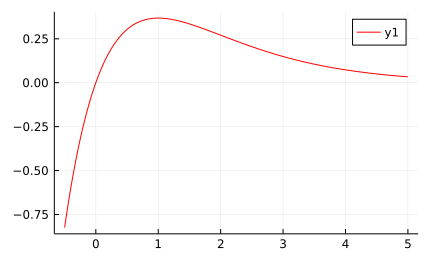

In [9]:
xs = -0.5:0.01:5
plot(xs, [f(x) for x in xs], size=(430, 260), color=col[1])

działanie metod:

In [10]:
tracker = Roots.Tracks()
# Bisection
x = find_zero(f, (-1, 5), Bisection(), verbose = true, tracks = tracker)
is_ok = check(f, x)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 5 )



true

In [11]:
# Newton
D(f) = x->ForwardDiff.derivative(f, float(x))
x = find_zero((f, D(f)), 1, Roots.Newton(), verbose = true, tracks = tracker) 
is_ok = check(f, x)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = 1,	 fx₁ = 0.36787944117144233
x₂ = -Inf,	 fx₂ = -Inf
(a₂, b₂) = ( 0, 5 )



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

In [12]:
# Steffensen
x = find_zero(f, 1, Order2(), verbose = true, tracks = tracker) 
is_ok = check(f, x)

Results of univariate zero finding:

* Converged to: 330279.65386952134
* Algorithm: Order2()
* iterations: 2
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1,	 fx₁ = 0.36787944117144233
x₂ = -Inf,	 fx₂ = -Inf
x₃ = 1.000006055491121,	 fx₃ = 0.36787944116469745
x₄ = 1,	 fx₄ = 0.36787944117144233
x₅ = 330279.65386952134,	 fx₅ = 0
(a₅, b₅) = ( 0, 5 )



true

- metoda bisekcji znalazła pierwiastek 
- metoda Newtona nie zbiegła do żadnego punktu
- metoda Steffensena znalazła błędny pierwiastek

Kiedy dane metody zawodzą

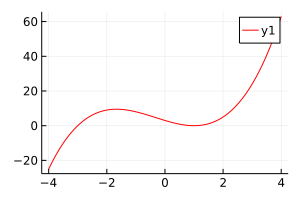

In [13]:
# Bisection
xs = -4:0.01:4
plot(xs, [f2(x) for x in xs], color=col[1], size = (300, 200))

Znaki muszą być różne na krańcach przedziału, w tym przypadku pierwiastek istnieje ale nie ma zmiany znaku w przedziale (-2, 2)

In [14]:
x = find_zero(f2, (-2, 2), Bisection(), verbose = true, tracks = tracker)
is_ok = check(f2, x)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



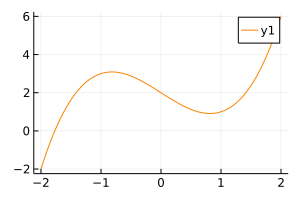

In [15]:
# Newton 
f7(x) = x^3 - 2x + 2
xs = -2:0.01:2
plot(xs, [f7(x) for x in xs], color=col[4], size = (300, 200))

Nie zbiega, ponieważ jeśli wieźmiemy jaku punkt startowy 0, to potem powstanie zapętlenie

In [16]:
D(f7) = x->ForwardDiff.derivative(f7, float(x))
x = find_zero((f7, D(f7)), 0, Roots.Newton(), verbose = true, tracks = tracker) 
is_ok = check(f7, x)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = 1,	 fx₁ = 0.36787944117144233
x₂ = -Inf,	 fx₂ = -Inf
x₃ = 1.000006055491121,	 fx₃ = 0.36787944116469745
x₄ = 1,	 fx₄ = 0.36787944117144233
x₅ = 330279.65386952134,	 fx₅ = 0
x₆ = 0,	 fx₆ = 2
x₇ = 1,	 fx₇ = 1
x₈ = 0,	 fx₈ = 2
x₉ = 1,	 fx₉ = 1
x₁₀ = 0,	 fx₁₀ = 2
x₁₁ = 1,	 fx₁₁ = 1
x₁₂ = 0,	 fx₁₂ = 2
x₁₃ = 1,	 fx₁₃ = 1
x₁₄ = 0,	 fx₁₄ = 2
x₁₅ = 1,	 fx₁₅ = 1
x₁₆ = 0,	 fx₁₆ = 2
x₁₇ = 1,	 fx₁₇ = 1
x₁₈ = 0,	 fx₁₈ = 2
x₁₉ = 1,	 fx₁₉ = 1
x₂₀ = 0,	 fx₂₀ = 2
x₂₁ = 1,	 fx₂₁ = 1
x₂₂ = 0,	 fx₂₂ = 2
x₂₃ = 1,	 fx₂₃ = 1
x₂₄ = 0,	 fx₂₄ = 2
x₂₅ = 1,	 fx₂₅ = 1
x₂₆ = 0,	 fx₂₆ = 2
x₂₇ = 1,	 fx₂₇ = 1
x₂₈ = 0,	 fx₂₈ = 2
x₂₉ = 1,	 fx₂₉ = 1
x₃₀ = 0,	 fx₃₀ = 2
x₃₁ = 1,	 fx₃₁ = 1
x₃₂ = 0,	 fx₃₂ = 2
x₃₃ = 1,	 fx₃₃ = 1
x₃₄ = 0,	 fx₃₄ = 2
x₃₅ = 1,	 fx₃₅ = 1
x₃₆ = 0,	 fx₃₆ = 2
x₃₇ = 1,	 fx₃₇ = 1
x₃₈ = 0,	 fx₃₈ = 2
x₃₉ = 1,	 fx₃₉ = 1
x₄₀ = 0,	 fx₄₀ = 2
x₄₁ = 1,	 fx₄₁ = 1
x₄₂ = 0,	 fx₄₂ = 2
x₄₃ = 1,	 fx₄₃ = 1
x₄₄ = 0,	 fx₄

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

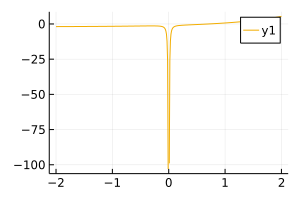

In [17]:
# Secant
f8(x) = exp(x)-2-1/(10*x)^2+2/(100*x)^3
xs = -2:0.01:2
plot(xs, [f8(x) for x in xs], color=col[3], size = (300, 200))

Funkcja dąży do -Inf i algorytm nie zbiega 

In [18]:
x = find_zero(f8, -2, Order1(), verbose = true, tracks = tracker) 
check(f8, x)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Secant()

Trace:
x₁ = 1,	 fx₁ = 0.36787944117144233
x₂ = -Inf,	 fx₂ = -Inf
x₃ = 1.000006055491121,	 fx₃ = 0.36787944116469745
x₄ = 1,	 fx₄ = 0.36787944117144233
x₅ = 330279.65386952134,	 fx₅ = 0
x₆ = 0,	 fx₆ = 2
x₇ = 1,	 fx₇ = 1
x₈ = 0,	 fx₈ = 2
x₉ = 1,	 fx₉ = 1
x₁₀ = 0,	 fx₁₀ = 2
x₁₁ = 1,	 fx₁₁ = 1
x₁₂ = 0,	 fx₁₂ = 2
x₁₃ = 1,	 fx₁₃ = 1
x₁₄ = 0,	 fx₁₄ = 2
x₁₅ = 1,	 fx₁₅ = 1
x₁₆ = 0,	 fx₁₆ = 2
x₁₇ = 1,	 fx₁₇ = 1
x₁₈ = 0,	 fx₁₈ = 2
x₁₉ = 1,	 fx₁₉ = 1
x₂₀ = 0,	 fx₂₀ = 2
x₂₁ = 1,	 fx₂₁ = 1
x₂₂ = 0,	 fx₂₂ = 2
x₂₃ = 1,	 fx₂₃ = 1
x₂₄ = 0,	 fx₂₄ = 2
x₂₅ = 1,	 fx₂₅ = 1
x₂₆ = 0,	 fx₂₆ = 2
x₂₇ = 1,	 fx₂₇ = 1
x₂₈ = 0,	 fx₂₈ = 2
x₂₉ = 1,	 fx₂₉ = 1
x₃₀ = 0,	 fx₃₀ = 2
x₃₁ = 1,	 fx₃₁ = 1
x₃₂ = 0,	 fx₃₂ = 2
x₃₃ = 1,	 fx₃₃ = 1
x₃₄ = 0,	 fx₃₄ = 2
x₃₅ = 1,	 fx₃₅ = 1
x₃₆ = 0,	 fx₃₆ = 2
x₃₇ = 1,	 fx₃₇ = 1
x₃₈ = 0,	 fx₃₈ = 2
x₃₉ = 1,	 fx₃₉ = 1
x₄₀ = 0,	 fx₄₀ = 2
x₄₁ = 1,	 fx₄₁ = 1
x₄₂ = 0,	 fx₄₂ = 2
x₄₃ = 1,	 fx₄₃ = 1
x₄₄ = 0,	 fx₄₄ = 2


LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

In [19]:
function NewtonsFractal(n, f, df, roots, iters, tolerance, cols)
    grid = rand(RGB, n, n)
    for i = 1:n
        for j = 1:n
            grid[i, j] = RGB(0, 0, 0)  # fill in  the grid with black
        end
    end

    for i = 1:n
        for j = 1:n
            zx = (n/2-i)/n      # scale zx, zy values for grid
            zy = -(n/2-j)/n
            z = zx+zy*im
        
            for k = 1:iters      # Newtons method at max iters iterations
                z -= f(z)/df(z)
                for r = 1:3            # for every found root check the closest true root value / if it's possible and color it
                    diff = z - roots[r]             
                    if(abs(real(diff)) < tolerance && abs(imag(diff)) < tolerance)
                        grid[j, i] = cols[r]
                    end
                end
            end    
        end
    end
    return grid
end

NewtonsFractal (generic function with 1 method)

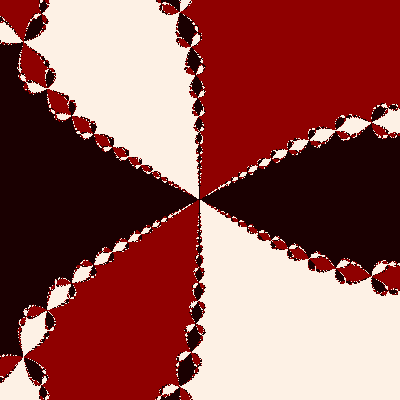

In [20]:
cols = [RGB(143/255, 0, 0), RGB(253/255, 241/255, 229/255), RGB(26/255, 0, 1/255)]
rs = roots(Polynomial([-1, 0, 0, 1]))
NewtonsFractal(400, z -> (z^3 - 1), z -> (3*z^2), rs, 50, 1e-7, cols)

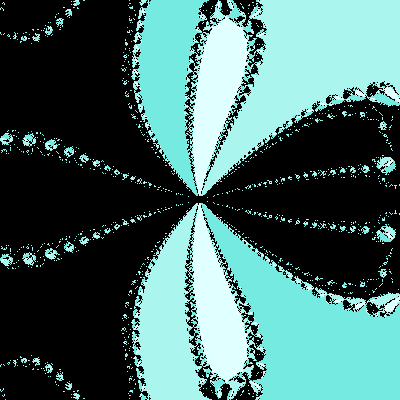

In [21]:
cols = palette([:lightcyan, :turquoise, :navy], 7)
rs = roots(Polynomial([-1, 0, 0, 1, -1, 0, 1]))
NewtonsFractal(400, z -> (z^6 - z^4 + z^3 - 1), z -> (6*z^5 - 4*z^3 + 3*z^2), rs, 50, 1e-7, cols)